# Diamond Price prediction Using R

1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns
 - Renaming the columns
 - Dropping duplicates
 - Remove the NaN values from the dataset
 - Some Transformations
3. **Data Visualization:** Using plots to find relations between the features.
4. **Linear Regression Analysis**
 - Preaparing dataset for training
 - Create a linear regression model
 - Train the model to fit the data
 - Make predictions using the trained model
 

#### The Dataset contains 26967 rows and 10 variables. Here are some definations about the variables:-

1. **Carat** weight of the diamond
2. **Cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
3. **color** diamond colour, from J (worst) to D (best)
4. **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. **x** is the length in mm
6. **y** is the width in mm
7. **z** is the depth in m
8. **depth**: The height of a diamond
9. **table**: The width of the diamond’s table expressed as a percentage of its average diameter

#### The goal is to use machine learning techniques to obtain the predicted diamond price with the minimum errors from the actual price, which involved a complete process of exploratory data analysis, feature engineering, feature selection and predictive modeling analysis.

#### We will use 2 models here to check if their is any significant difference between them and to measure accuracy of the actual model.

Model 1:Interaction with the actual variables<br>
Model 2: Dummy variables<br>

In [170]:
#Loading packages

library(tidyverse)
library(corrplot)
library(psych)
library(fastDummies)
library(caTools)
library(Metrics)
library(car)
library(gridExtra)
library(lattice)

In [171]:
#loading the dataset

setwd("C:/Users/LENOVO/Downloads/Zomato data")
data<- read.csv("cubic_zirconia.csv")
print(head(data,10))

    X carat       cut color clarity depth table    x    y    z price
1   1  0.30     Ideal     E     SI1  62.1    58 4.27 4.29 2.66   499
2   2  0.33   Premium     G      IF  60.8    58 4.42 4.46 2.70   984
3   3  0.90 Very Good     E    VVS2  62.2    60 6.04 6.12 3.78  6289
4   4  0.42     Ideal     F     VS1  61.6    56 4.82 4.80 2.96  1082
5   5  0.31     Ideal     F    VVS1  60.4    59 4.35 4.43 2.65   779
6   6  1.02     Ideal     D     VS2  61.5    56 6.46 6.49 3.99  9502
7   7  1.01      Good     H     SI1  63.7    60 6.35 6.30 4.03  4836
8   8  0.50   Premium     E     SI1  61.5    62 5.09 5.06 3.12  1415
9   9  1.21      Good     H     SI1  63.8    64 6.72 6.63 4.26  5407
10 10  0.35     Ideal     F     VS2  60.5    57 4.52 4.60 2.76   706


In [172]:
#Basic analysis on the dataset

str(data)

'data.frame':	26967 obs. of  11 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ carat  : num  0.3 0.33 0.9 0.42 0.31 1.02 1.01 0.5 1.21 0.35 ...
 $ cut    : Factor w/ 5 levels "Fair","Good",..: 3 4 5 3 3 3 2 4 2 3 ...
 $ color  : Factor w/ 7 levels "D","E","F","G",..: 2 4 2 3 3 1 5 2 5 3 ...
 $ clarity: Factor w/ 8 levels "I1","IF","SI1",..: 3 2 8 5 7 6 3 3 3 6 ...
 $ depth  : num  62.1 60.8 62.2 61.6 60.4 61.5 63.7 61.5 63.8 60.5 ...
 $ table  : num  58 58 60 56 59 56 60 62 64 57 ...
 $ x      : num  4.27 4.42 6.04 4.82 4.35 6.46 6.35 5.09 6.72 4.52 ...
 $ y      : num  4.29 4.46 6.12 4.8 4.43 6.49 6.3 5.06 6.63 4.6 ...
 $ z      : num  2.66 2.7 3.78 2.96 2.65 3.99 4.03 3.12 4.26 2.76 ...
 $ price  : int  499 984 6289 1082 779 9502 4836 1415 5407 706 ...


In [173]:
#Cleaning the data
colSums(is.na(data)) #checking the null values

X   carat     cut   color clarity   depth   table       x       y       z 
      0       0       0       0       0     697       0       0       0       0 
  price 
      0

In [174]:
#removing null values from the column

data1 <- filter(data,!is.na(data$depth)) 

colSums(is.na(data1))   #checking again after removing values

X   carat     cut   color clarity   depth   table       x       y       z 
      0       0       0       0       0       0       0       0       0       0 
  price 
      0

In [5]:
dim(data) #before Removing
dim(data1) #After removing

[1] 26967    11

[1] 26270    11

In [175]:
#Removing the dublicates values if there is any

data1 <- data1[!duplicated(data1),] 
data1 <- data1[-1] #removing the unwanted columns

In [7]:
print(head(data1,10))

   carat       cut color clarity depth table    x    y    z price
1   0.30     Ideal     E     SI1  62.1    58 4.27 4.29 2.66   499
2   0.33   Premium     G      IF  60.8    58 4.42 4.46 2.70   984
3   0.90 Very Good     E    VVS2  62.2    60 6.04 6.12 3.78  6289
4   0.42     Ideal     F     VS1  61.6    56 4.82 4.80 2.96  1082
5   0.31     Ideal     F    VVS1  60.4    59 4.35 4.43 2.65   779
6   1.02     Ideal     D     VS2  61.5    56 6.46 6.49 3.99  9502
7   1.01      Good     H     SI1  63.7    60 6.35 6.30 4.03  4836
8   0.50   Premium     E     SI1  61.5    62 5.09 5.06 3.12  1415
9   1.21      Good     H     SI1  63.8    64 6.72 6.63 4.26  5407
10  0.35     Ideal     F     VS2  60.5    57 4.52 4.60 2.76   706


In [176]:
#Renaming the column names

colnames(data1)[colnames(data1)=="x"] <-"length"
colnames(data1)[colnames(data1)=="y"] <-"width"
colnames(data1)[colnames(data1)=="z"] <-"Height"

In [177]:
#Checking the dataset after tranformations

print(head(data1,10))

   carat       cut color clarity depth table length width Height price
1   0.30     Ideal     E     SI1  62.1    58   4.27  4.29   2.66   499
2   0.33   Premium     G      IF  60.8    58   4.42  4.46   2.70   984
3   0.90 Very Good     E    VVS2  62.2    60   6.04  6.12   3.78  6289
4   0.42     Ideal     F     VS1  61.6    56   4.82  4.80   2.96  1082
5   0.31     Ideal     F    VVS1  60.4    59   4.35  4.43   2.65   779
6   1.02     Ideal     D     VS2  61.5    56   6.46  6.49   3.99  9502
7   1.01      Good     H     SI1  63.7    60   6.35  6.30   4.03  4836
8   0.50   Premium     E     SI1  61.5    62   5.09  5.06   3.12  1415
9   1.21      Good     H     SI1  63.8    64   6.72  6.63   4.26  5407
10  0.35     Ideal     F     VS2  60.5    57   4.52  4.60   2.76   706


In [178]:
#summary of the cleaned dataset

summary(data1)

     carat              cut        color       clarity         depth      
 Min.   :0.200   Fair     :  757   D:3268   SI1    :6408   Min.   :50.80  
 1st Qu.:0.400   Good     : 2382   E:4793   VS2    :5925   1st Qu.:61.00  
 Median :0.700   Ideal    :10546   F:4612   SI2    :4447   Median :61.80  
 Mean   :0.798   Premium  : 6707   G:5529   VS1    :3991   Mean   :61.75  
 3rd Qu.:1.050   Very Good: 5878   H:3991   VVS2   :2479   3rd Qu.:62.50  
 Max.   :4.500                     I:2676   VVS1   :1791   Max.   :73.60  
                                   J:1401   (Other):1229                  
     table           length           width            Height     
 Min.   :49.00   Min.   : 0.000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:56.00   1st Qu.: 4.710   1st Qu.: 4.720   1st Qu.:2.900  
 Median :57.00   Median : 5.690   Median : 5.700   Median :3.520  
 Mean   :57.46   Mean   : 5.729   Mean   : 5.733   Mean   :3.537  
 3rd Qu.:59.00   3rd Qu.: 6.550   3rd Qu.: 6.540   3rd Qu.:4.040 

In [ ]:
# Exploratory Data Analysis 

Warning message:
"Ignoring unknown parameters: bin"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


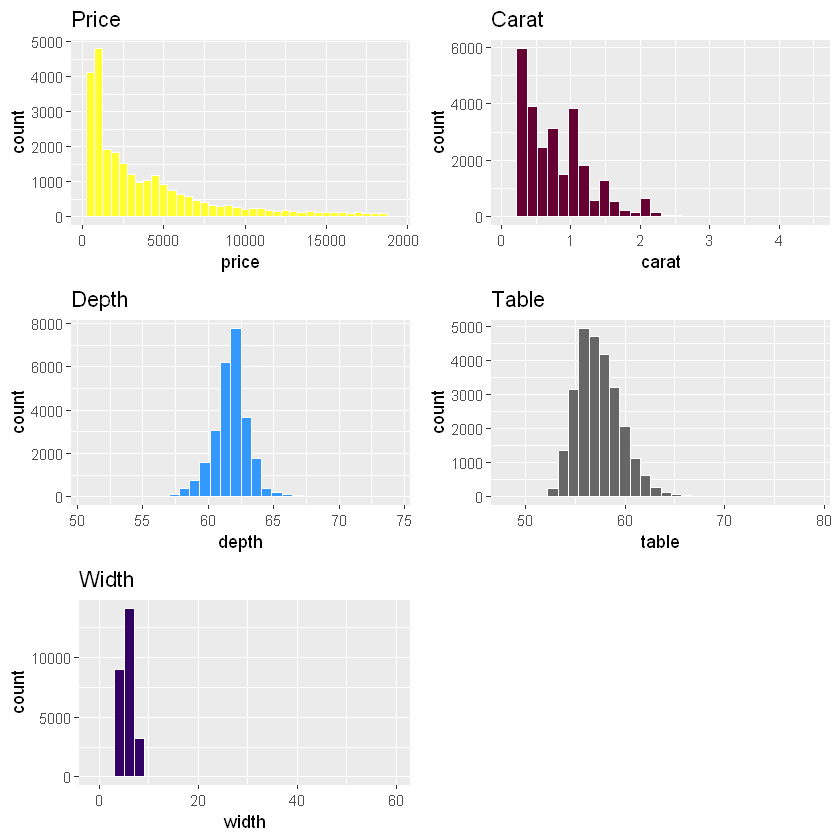

In [179]:
plot1 <- ggplot(data1,aes(x=price))+
  geom_histogram(color='white',fill = '#FFFF33',bin=30,binwidth=500)+
  ggtitle('Price')
#price is positively skewed

plot2 <- ggplot(data1,aes(x=carat),bins=30,w=20)+
  geom_histogram(color='white',fill = '#660033')+
  ggtitle('Carat')

plot3 <- ggplot(data1,aes(x=depth),bin=60)+
  geom_histogram(color='white',fill = '#3399FF')+
  ggtitle('Depth')

plot4 <- ggplot(data1,aes(x=table),bin=30)+
  geom_histogram(color='White',fill = '#666666')+
  ggtitle('Table')

plot5 <- ggplot(data1,aes(x=width),bin=30)+
  geom_histogram(color='white',fill = '#330066')+
  ggtitle('Width')

library(gridExtra)
grid.arrange(plot1,plot2,plot3,plot4,plot5)

#### From the histograms plot, we can observe that the price and carat are purely positively skewed which can be because of the presence of extreme values or outliers and table graph is slighly positively skewed whereas depth and width graphs are normally distributed.

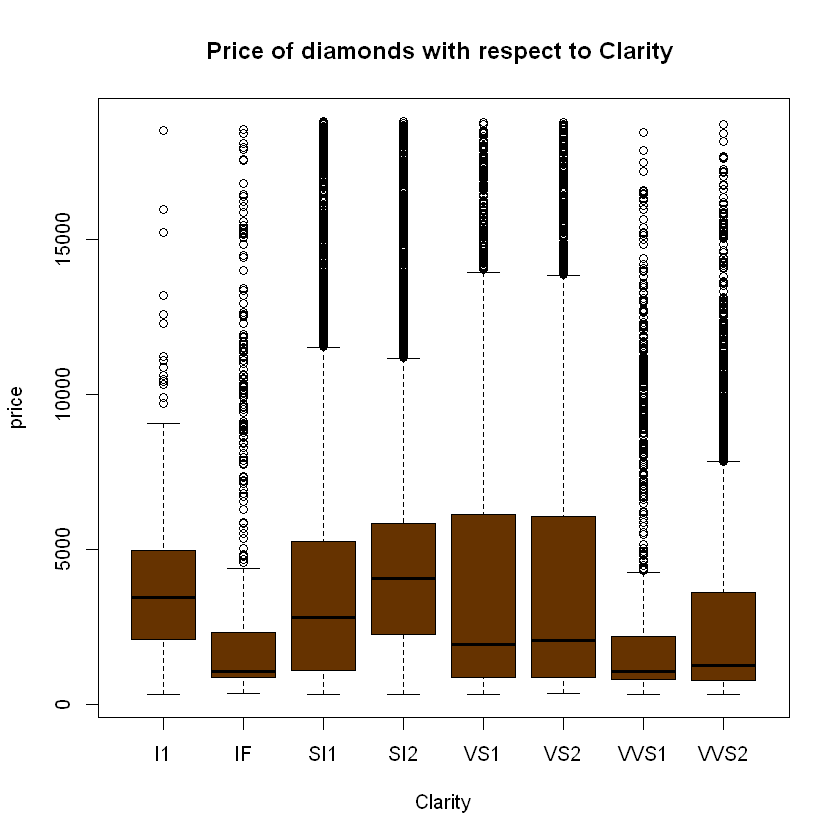

In [12]:
#visualizing through boxplots

boxplot1 <- boxplot(price~clarity, data=data1, 
        col="#663300",
        main="Price of diamonds with respect to Clarity ", xlab="Clarity")


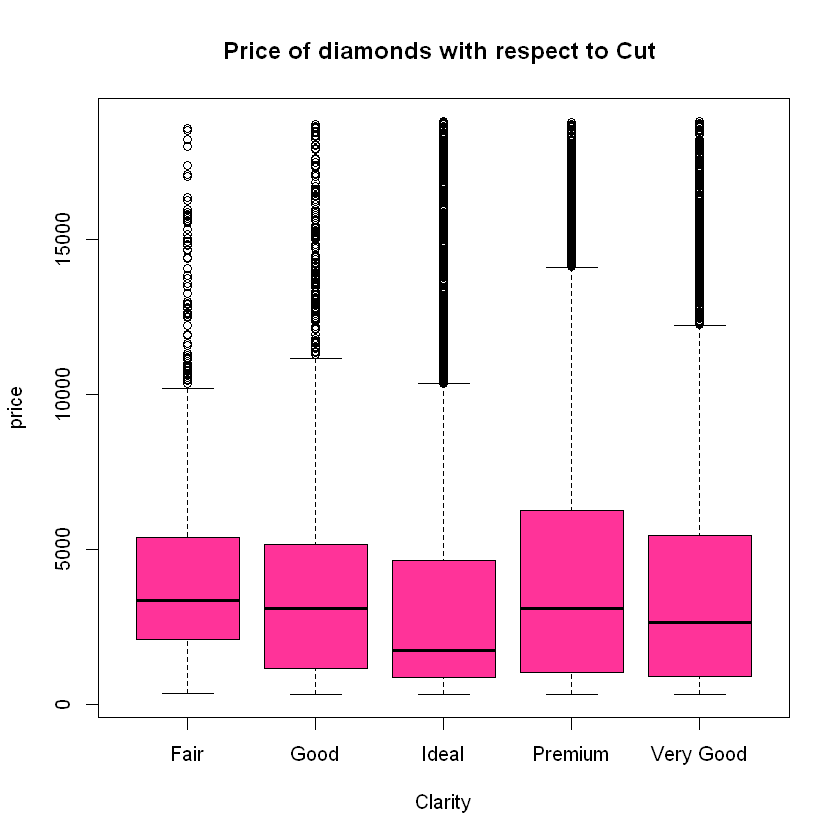

In [13]:
boxplot2 <- boxplot(price~cut, data=data1, 
        col="#FF3399",
        main="Price of diamonds with respect to Cut ", xlab="Clarity")

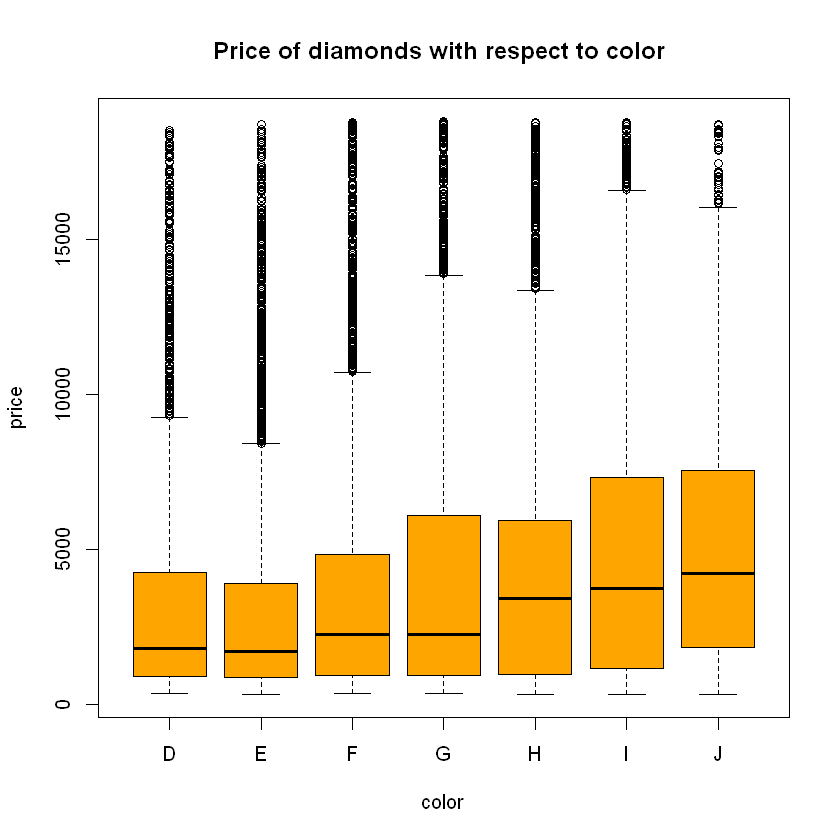

In [10]:
boxplot3 <- boxplot(price~color, data=data1, 
        col="orange",
        main="Price of diamonds with respect to color ", xlab="color")

#### Box plot helps to compare the data spread, central tendencies (Median) and ouliers. We can see that in the price vs cut plot, the price of the diamond should increase as the quality increase but that is not clear here. Price of premium>ideal. The same pattern could be seen in color vs price plot as well. The prices should drop from best to worst but the case is opposite here.There can be some other variables that might be affecting the price based on color and cut.

`geom_smooth()` using formula 'y ~ x'



	Pearson's product-moment correlation

data:  data1$price and data1$carat
t = 386.31, df = 26268, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9203033 0.9239235
sample estimates:
      cor 
0.9221336 


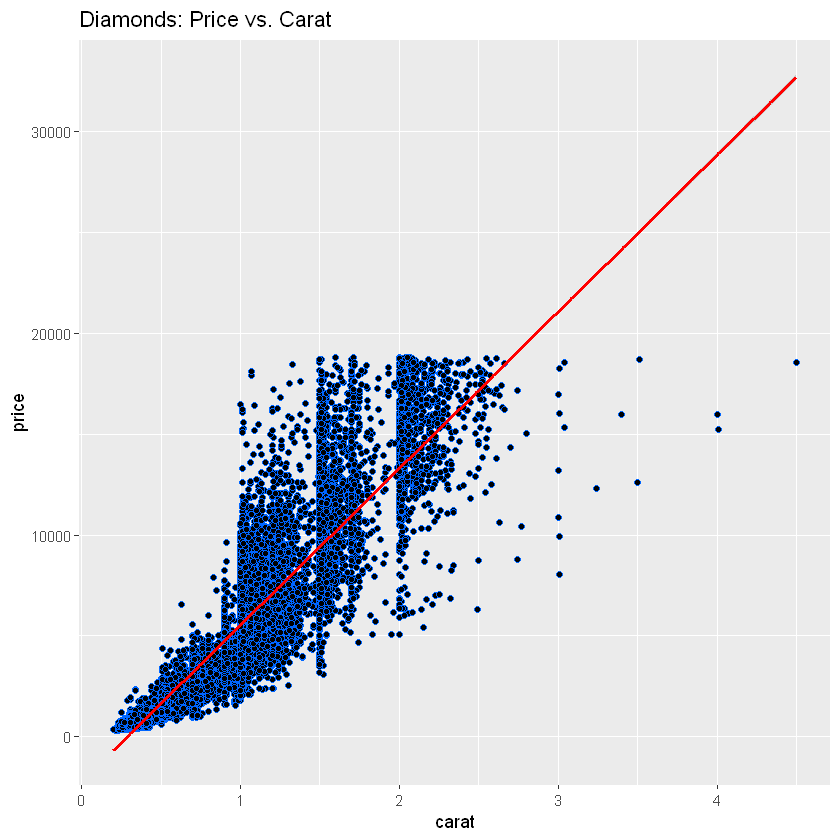

In [180]:
#creating scatter plot between price and carat
ggplot(aes(x=carat, y=price), data=data1) +
  geom_point(fill=I("black"), color=I("#0066FF"), shape=21) +
  stat_smooth(method="lm",color="red") +
  ggtitle("Diamonds: Price vs. Carat")

cor.test(data1$price,data1$carat)

#### From the scatter plot between carat and price, we can observed that the variables are highly positively correlated with 0.922 correlation.

### Label Encoding for the columns that has levels to calculate the correlations between all the featured variables.

In [181]:
data2 <- data1%>%
  dplyr::select(cut,color,clarity,carat,depth,length,width,Height,price,table)

data2$cut <- dplyr::recode(data1$cut,"Fair"=0, "Good"=1,"Very Good"= 2, "Premium"=3,"Ideal"=4)
data2$color <- dplyr::recode(data1$color, "D"=6, "E"=5,"F"=4,"G"=3,"H"=2,"I"=1,"J"=0)
data2$clarity <- dplyr::recode(data1$clarity,"I1"=0,"SI2"=1,"SI1"=2,"VS2"=3,"VS1"=4,"VVS2"=5,"VVS1"=6,"IF"=7)

In [182]:
print(head(data2,10))

   cut color clarity carat depth length width Height price table
1    4     5       2  0.30  62.1   4.27  4.29   2.66   499    58
2    3     3       7  0.33  60.8   4.42  4.46   2.70   984    58
3    2     5       5  0.90  62.2   6.04  6.12   3.78  6289    60
4    4     4       4  0.42  61.6   4.82  4.80   2.96  1082    56
5    4     4       6  0.31  60.4   4.35  4.43   2.65   779    59
6    4     6       3  1.02  61.5   6.46  6.49   3.99  9502    56
7    1     2       2  1.01  63.7   6.35  6.30   4.03  4836    60
8    3     5       2  0.50  61.5   5.09  5.06   3.12  1415    62
9    1     2       2  1.21  63.8   6.72  6.63   4.26  5407    64
10   4     4       3  0.35  60.5   4.52  4.60   2.76   706    57


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""cl.lim" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""cl.lim" is not a graphical parameter"Warning message in title(title, ...):
""cl.lim" is not a graphical parameter"

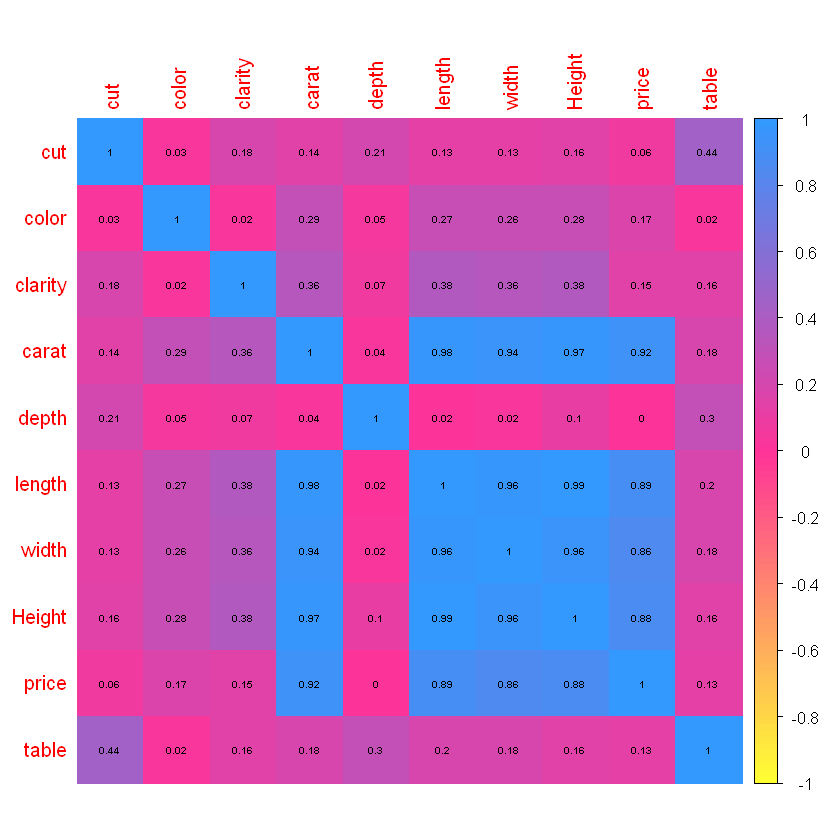

In [19]:
corrplot(abs(cor(data2)), addCoef.col = 1,    
         number.cex = 0.5,method="color",col=colorRampPalette(c("#FFFF33","#FF3399","#3399FF"))(100),cl.lim=c(0,1))

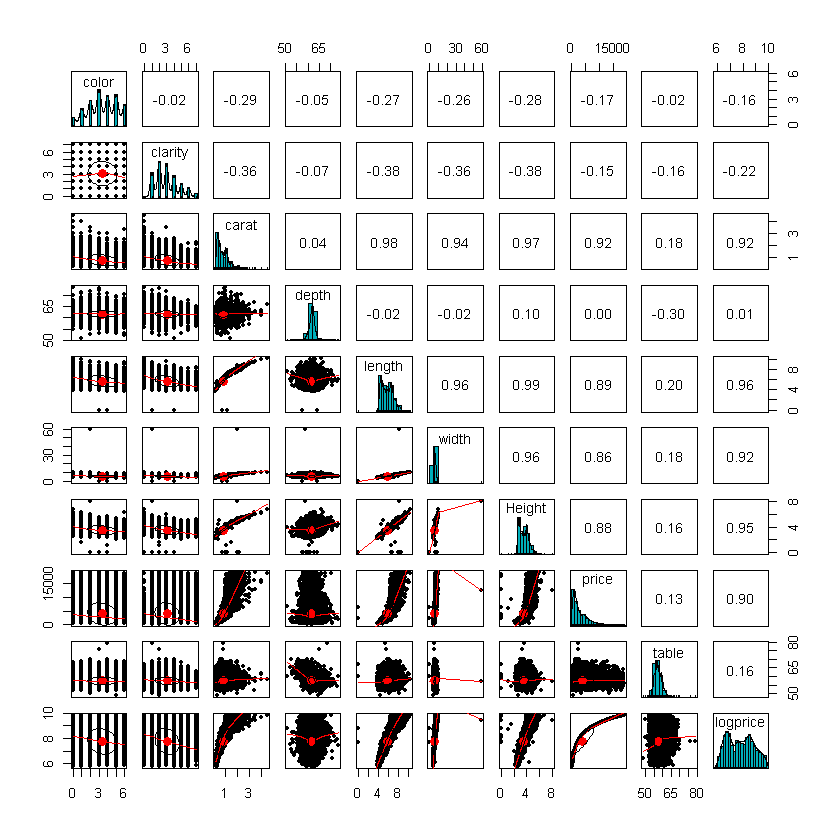

In [27]:
pairs.panels(data2[,-1], 
             method = "pearson", 
             hist.col = "#00AFBB",
             density = TRUE,  
             ellipses = TRUE
             )

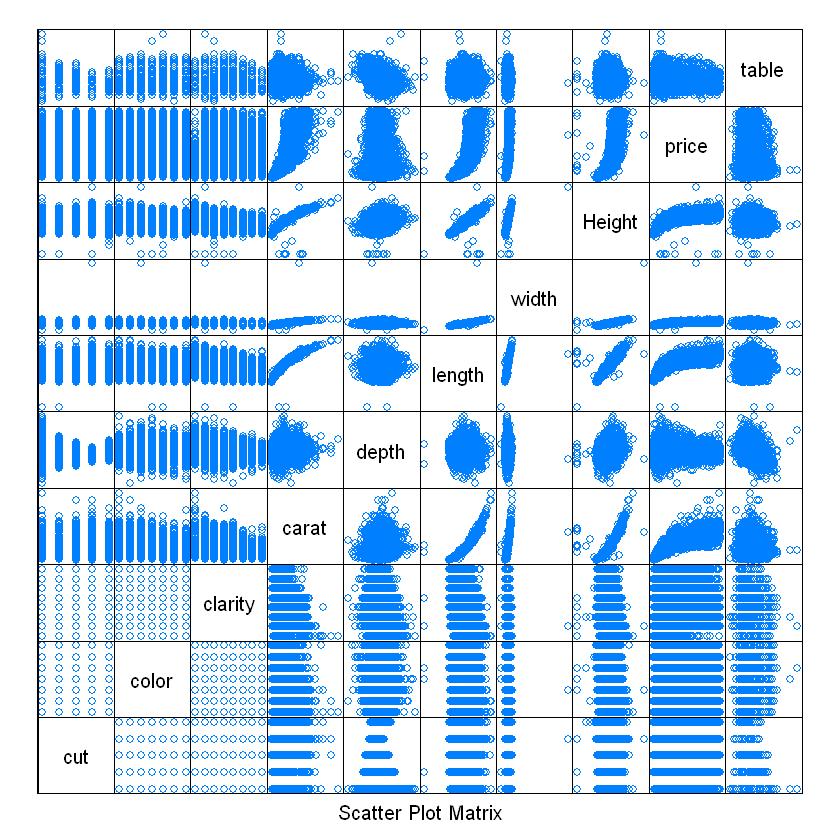

In [28]:
splom(~data2[c(1:10)],groups=NULL,data = data2,axis.line.tck=0,axis.text.alpha=0)

#### The above scatterplot matrix and correlation plot between variables shows that, the correlation between price and length,width and height are highly positive and the least corr can be seen in price and cut pairs whereas the highest is between carat and price. Carat with lenght,width and height are highly correlated. 

In [183]:
#Before applying the linear regression model, we have to transform the columns so that it follows all the assumptions of LModel

#to make columns normal
data2$logprice=log(data2$price)
print(head(data2,10))

   cut color clarity carat depth length width Height price table logprice
1    4     5       2  0.30  62.1   4.27  4.29   2.66   499    58 6.212606
2    3     3       7  0.33  60.8   4.42  4.46   2.70   984    58 6.891626
3    2     5       5  0.90  62.2   6.04  6.12   3.78  6289    60 8.746557
4    4     4       4  0.42  61.6   4.82  4.80   2.96  1082    56 6.986566
5    4     4       6  0.31  60.4   4.35  4.43   2.65   779    59 6.658011
6    4     6       3  1.02  61.5   6.46  6.49   3.99  9502    56 9.159258
7    1     2       2  1.01  63.7   6.35  6.30   4.03  4836    60 8.483843
8    3     5       2  0.50  61.5   5.09  5.06   3.12  1415    62 7.254885
9    1     2       2  1.21  63.8   6.72  6.63   4.26  5407    64 8.595450
10   4     4       3  0.35  60.5   4.52  4.60   2.76   706    57 6.559615


In [184]:
#we will make 2 models, one with dummy variable and another one with the original variables and checking the accuracy
set.seed(1234)
sample <- sample.split(data2$logprice,SplitRatio = 0.70)
train <- subset(data2,sample==TRUE)
test <- subset(data2,sample==FALSE)

In [185]:
model <- lm(logprice~color+clarity+log(carat)+cut
            ,data = train)
model_sum <- summary(model)
model_sum


Call:
lm(formula = logprice ~ color + clarity + log(carat) + cut, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07315 -0.09068  0.00270  0.09694  1.45829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.7874241  0.0040156 1939.27   <2e-16 ***
color       0.0793663  0.0006499  122.11   <2e-16 ***
clarity     0.1241490  0.0007084  175.24   <2e-16 ***
log(carat)  1.8817379  0.0020206  931.28   <2e-16 ***
cut         0.0325032  0.0009721   33.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1463 on 19024 degrees of freedom
Multiple R-squared:  0.9801,	Adjusted R-squared:  0.9801 
F-statistic: 2.344e+05 on 4 and 19024 DF,  p-value: < 2.2e-16


In [44]:
test$pred3 <- model%>% predict(test)
print(head(test$pred3,25))

 [1] 6.905863 8.671746 6.775937 8.585656 6.542599 7.409034 7.873307 8.346162
 [9] 8.368921 7.542577 6.945540 8.600627 9.187302 6.634869 8.221123 7.545763
[17] 8.703755 7.234539 8.762502 6.314539 6.465937 7.291196 5.882030 7.072678
[25] 7.033579


In [45]:
##validation
rmse(test$logprice,test$pred3)
model_sum$r.squared

[1] 0.1453572

[1] 0.9801097

## Making prediction on a new dataset

In [50]:
diamond_price <- data.frame(carat=1.51,cut=3,color=2,depth=70,clarity=4) #creating a new dataframe
predict(model,diamond_price)
print(paste0("The price of the diamond is : " , (round(exp(9.297062)))))

1 
9.315745

[1] "The price of the diamond is : 10906"


## Creating dummy variables for the model 2

In [186]:
data_dummy <- dummy_cols(data2, select_columns = c('cut', 'color',"clarity"),
                         remove_selected_columns = TRUE)
print(head(data_dummy,10))

   carat depth length width Height price table logprice cut_0 cut_1 cut_2 cut_3
1   0.30  62.1   4.27  4.29   2.66   499    58 6.212606     0     0     0     0
2   0.33  60.8   4.42  4.46   2.70   984    58 6.891626     0     0     0     1
3   0.90  62.2   6.04  6.12   3.78  6289    60 8.746557     0     0     1     0
4   0.42  61.6   4.82  4.80   2.96  1082    56 6.986566     0     0     0     0
5   0.31  60.4   4.35  4.43   2.65   779    59 6.658011     0     0     0     0
6   1.02  61.5   6.46  6.49   3.99  9502    56 9.159258     0     0     0     0
7   1.01  63.7   6.35  6.30   4.03  4836    60 8.483843     0     1     0     0
8   0.50  61.5   5.09  5.06   3.12  1415    62 7.254885     0     0     0     1
9   1.21  63.8   6.72  6.63   4.26  5407    64 8.595450     0     1     0     0
10  0.35  60.5   4.52  4.60   2.76   706    57 6.559615     0     0     0     0
   cut_4 color_0 color_1 color_2 color_3 color_4 color_5 color_6 clarity_0
1      1       0       0       0       0     

## Training the model

In [187]:
sample1 <- sample.split(data_dummy$logprice,SplitRatio = 0.70)
train1 <- subset(data_dummy,sample==TRUE)
test1 <- subset(data_dummy,sample==FALSE)

In [188]:
#Building the linear model
model2 <- lm(logprice~log(carat)+
             cut_0+cut_1+cut_2+cut_3+
              color_0+color_1+color_2+color_3+color_4+color_5+clarity_0+
               clarity_1+clarity_2+clarity_3+clarity_4+clarity_5+clarity_6,
               data = train1)

In [189]:
model2_sum <- summary(model2)
model2_sum


Call:
lm(formula = logprice ~ log(carat) + cut_0 + cut_1 + cut_2 + 
    cut_3 + color_0 + color_1 + color_2 + color_3 + color_4 + 
    color_5 + clarity_0 + clarity_1 + clarity_2 + clarity_3 + 
    clarity_4 + clarity_5 + clarity_6, data = train1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77352 -0.08635 -0.00067  0.08326  1.46011 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.141568   0.006338 1442.38   <2e-16 ***
log(carat)   1.888285   0.001858 1016.55   <2e-16 ***
cut_0       -0.165365   0.006013  -27.50   <2e-16 ***
cut_1       -0.084390   0.003581  -23.57   <2e-16 ***
cut_2       -0.046689   0.002575  -18.13   <2e-16 ***
cut_3       -0.025999   0.002502  -10.39   <2e-16 ***
color_0     -0.519797   0.005075 -102.42   <2e-16 ***
color_1     -0.378936   0.004169  -90.89   <2e-16 ***
color_2     -0.253623   0.003756  -67.53   <2e-16 ***
color_3     -0.162011   0.003538  -45.79   <2e-16 ***
color_4     -0.094038   0.003613  -26.

In [ ]:
## Model Accuracy

In [134]:
model2_sum$adj.r.squared
model2_sum$r.squared
print("R squared: 0.984")
print("RSE: 0.133")

[1] 0.9834701

[1] 0.9834858

[1] "R squared: 0.984"
[1] "RSE: 0.133"


## Making predictions

In [113]:
#predicting values using model 2
test1$pred3 <- model2%>% predict(test1)
print(head(test1$pred3,50))

 [1] 6.860088 8.671894 6.741475 8.640803 6.559840 7.388629 7.801660 8.335530
 [9] 8.257056 7.580636 6.942470 8.535479 9.192090 6.611586 7.914344 7.576645
[17] 8.734465 7.243760 8.804234 6.283484 6.470317 7.335299 5.882102 7.044274
[25] 7.071072 9.096739 7.561986 7.572937 7.971102 8.853417 6.095678 8.100932
[33] 6.611586 9.987659 6.692162 6.538000 6.310732 8.140926 7.263323 7.289864
[41] 7.072287 6.143906 7.481823 8.385248 7.291484 7.671784 6.475035 6.765957
[49] 9.162513 8.553192


In [135]:
# Model performance

#### (a) Compute the prediction error, RMSE

rmse(test1$logprice,test1$pred3)

[1] 0.1331665

`geom_smooth()` using formula 'y ~ x'


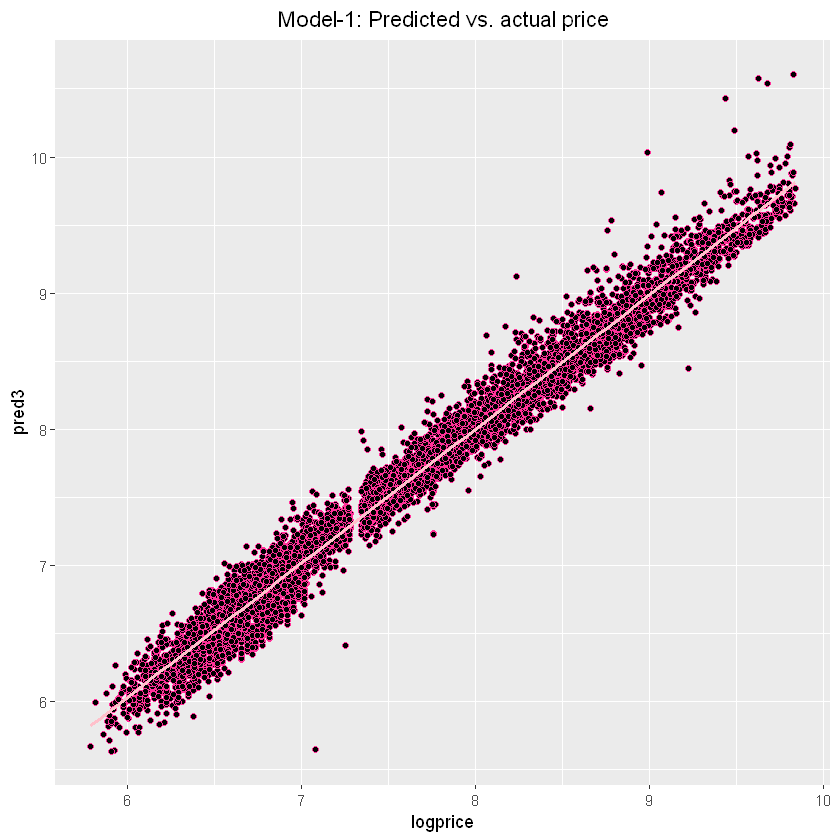

In [41]:
mod3 <- ggplot(aes(x=logprice, y=pred3), data=test) +
  geom_point(fill=I("black"), color=I("#FF3399"), shape=21) +
  stat_smooth(method="lm", col="pink") +
  ggtitle("Model-1: Predicted vs. actual price") +
  #geom_abline()
  theme(plot.title = element_text(hjust = 0.5))
print(mod3)

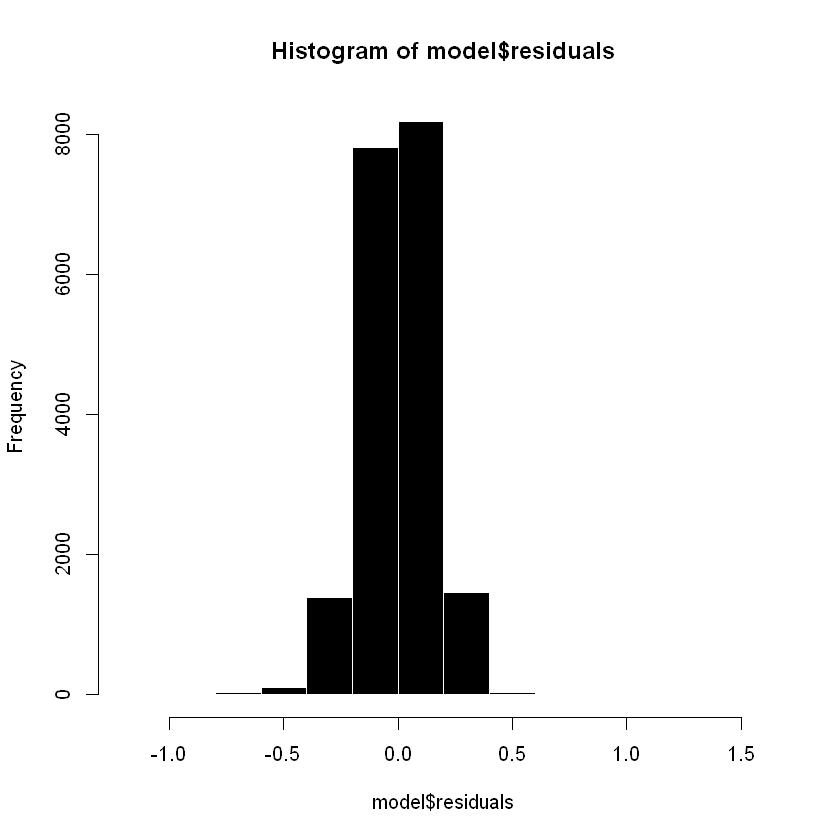

In [167]:
hist(model$residuals,col="black",border="white")

#### In Predicted vs. Actual price graphs, We could say that a lot of predicted values are very close to the line. Except for some observations which are away from the fitted line, we can say that predicted values are accurate with the actual values.

#### Residuals graph- Residuals of model 1 are relatively symmetrical and also validate the assumption of linear regression that error should be independent and normally distributed.

`geom_smooth()` using formula 'y ~ x'


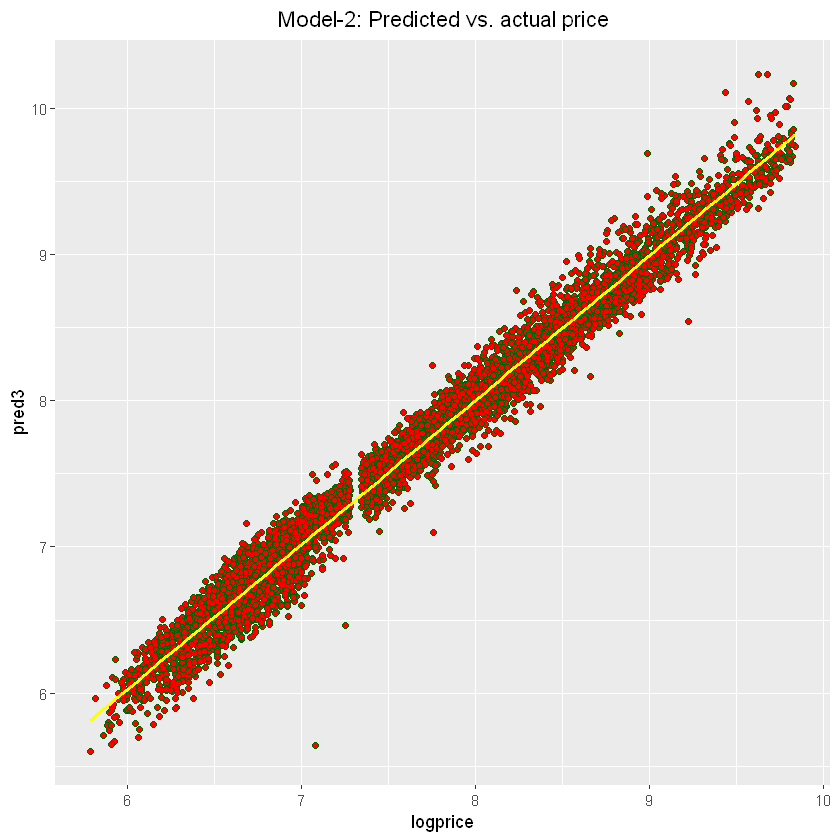

In [48]:
model2_plot <- ggplot(aes(x=logprice, y=pred3), data=test1) +
  geom_point(fill=I("red"), color=I("darkgreen"), shape=21) +
  stat_smooth(method="lm", col="yellow") +
  ggtitle("Model-2: Predicted vs. actual price") +
  #geom_abline()
  theme(plot.title = element_text(hjust = 0.5))
print(model2_plot)

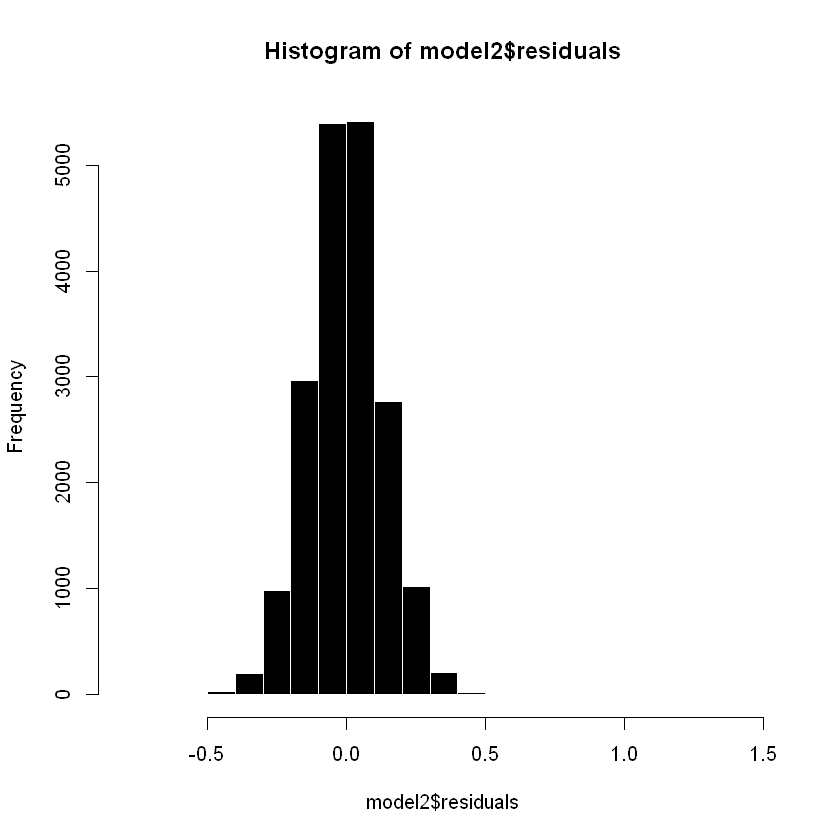

In [168]:
hist(model2$residuals,col="black",border="white")

### Similar pattern can also be seen in model 2 plots. 

### From the above 2 models, we can see that model 2(R2=98.34) gives slightly higher accuracy compare to model1(R2=98.01). But since the difference(0.0039) is not significant, we can use any model for our dataset since both the models are equally performing good.